<a href="https://colab.research.google.com/github/pranao0609/FoundationofML/blob/main/World_Population_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('world_population.csv')
df.head()

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5


In [3]:
#Understand Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          205 non-null    int64 
 1   country name        205 non-null    object
 2   current population  205 non-null    object
 3   population 2022     205 non-null    object
 4   area                205 non-null    object
 5   land area           205 non-null    object
 6   density             205 non-null    object
 7   growth rate         205 non-null    object
 8   world percentage    204 non-null    object
 9   rank                205 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 16.1+ KB


In [4]:
df["world percentage"].isna()

,world percentage
0,False
1,False
2,False
3,False
4,False
...,...
200,False
201,False
202,False
203,False


In [5]:
mask = df["world percentage"].isna()
df[mask]

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
204,204,Vatican City,518,510,< 1,< 1,"1,177",1.57%,NaN,234


In [6]:
df["world percentage"].fillna(0,inplace = True)

<ipython-input-6-1819e8e5367d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["world percentage"].fillna(0,inplace = True)


In [7]:
df[df.duplicated()]

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank


In [8]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [9]:
df.sort_index(inplace = True)

In [10]:
df.columns = df.columns.str.title()

In [11]:
df.head()

,Country Name,Current Population,Population 2022,Area,Land Area,Density,Growth Rate,World Percentage,Rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5


In [12]:
df.rename(columns = {"Country Name":"Country"},inplace = True)
df.rename(columns = {'Current Population':"Population 2023"},inplace = True)
df.rename(columns = {'Area':'Area(km²)'},inplace = True)
df.rename(columns = {'Land Area':'Land Area(km²)'},inplace = True)
df.rename(columns = {'Density':'Density (/km²)'},inplace = True)
df.rename(columns = {'World Percentage':'World %'},inplace = True)

In [13]:
df.head()

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5


In [14]:
df["Population 2023"]= df["Population 2023"].str.replace(',','')
df["Population 2022"]=df["Population 2022"].str.replace(',','')
df["Growth Rate"]=df["Growth Rate"].str.replace('%','')
df["World %"]=df["World %"].str.replace('%','')
df["Density (/km²)"]=df["Density (/km²)"].str.replace(',','')
df.head()

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1423118510,1417173173,3.3M,3M,481,0.81,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312,1.98,3.00,5


In [15]:
df.loc[0,"Population 2023"] = 1429834379
df.loc[0,"Growth Rate"]= 0.91

In [16]:
df = df.astype({'Population 2023':'int','Population 2022':'int','Growth Rate': 'float', 'World %': 'float',"Density (/km²)":"float"},errors = "raise")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          205 non-null    object 
 1   Population 2023  205 non-null    int64  
 2   Population 2022  205 non-null    int64  
 3   Area(km²)        205 non-null    object 
 4   Land Area(km²)   205 non-null    object 
 5   Density (/km²)   205 non-null    float64
 6   Growth Rate      205 non-null    float64
 7   World %          204 non-null    float64
 8   Rank             205 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 14.5+ KB


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
m1 = df.head(10)
m1

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1429834379,1417173173,3.3M,3M,481.0,0.91,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151.0,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37.0,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148.0,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312.0,1.98,3.00,5
5,Nigeria,221592544,218541212,923.8K,910.8K,246.0,2.41,2.80,6
6,Brazil,215904975,215313498,8.5M,8.4M,26.0,0.52,2.70,7
7,Bangladesh,172220907,171186372,147.6K,130.2K,1329.0,1.03,2.16,8
8,Russia,144652401,144713314,17.1M,16.4M,9.0,-0.19,1.80,9
9,Mexico,128061868,127504125,2M,1.9M,66.0,0.75,1.60,10


<ipython-input-22-607a22482593>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels = m1["Country"],rotation=90)
<ipython-input-22-607a22482593>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(labels = m1["Country"],rotation=90)


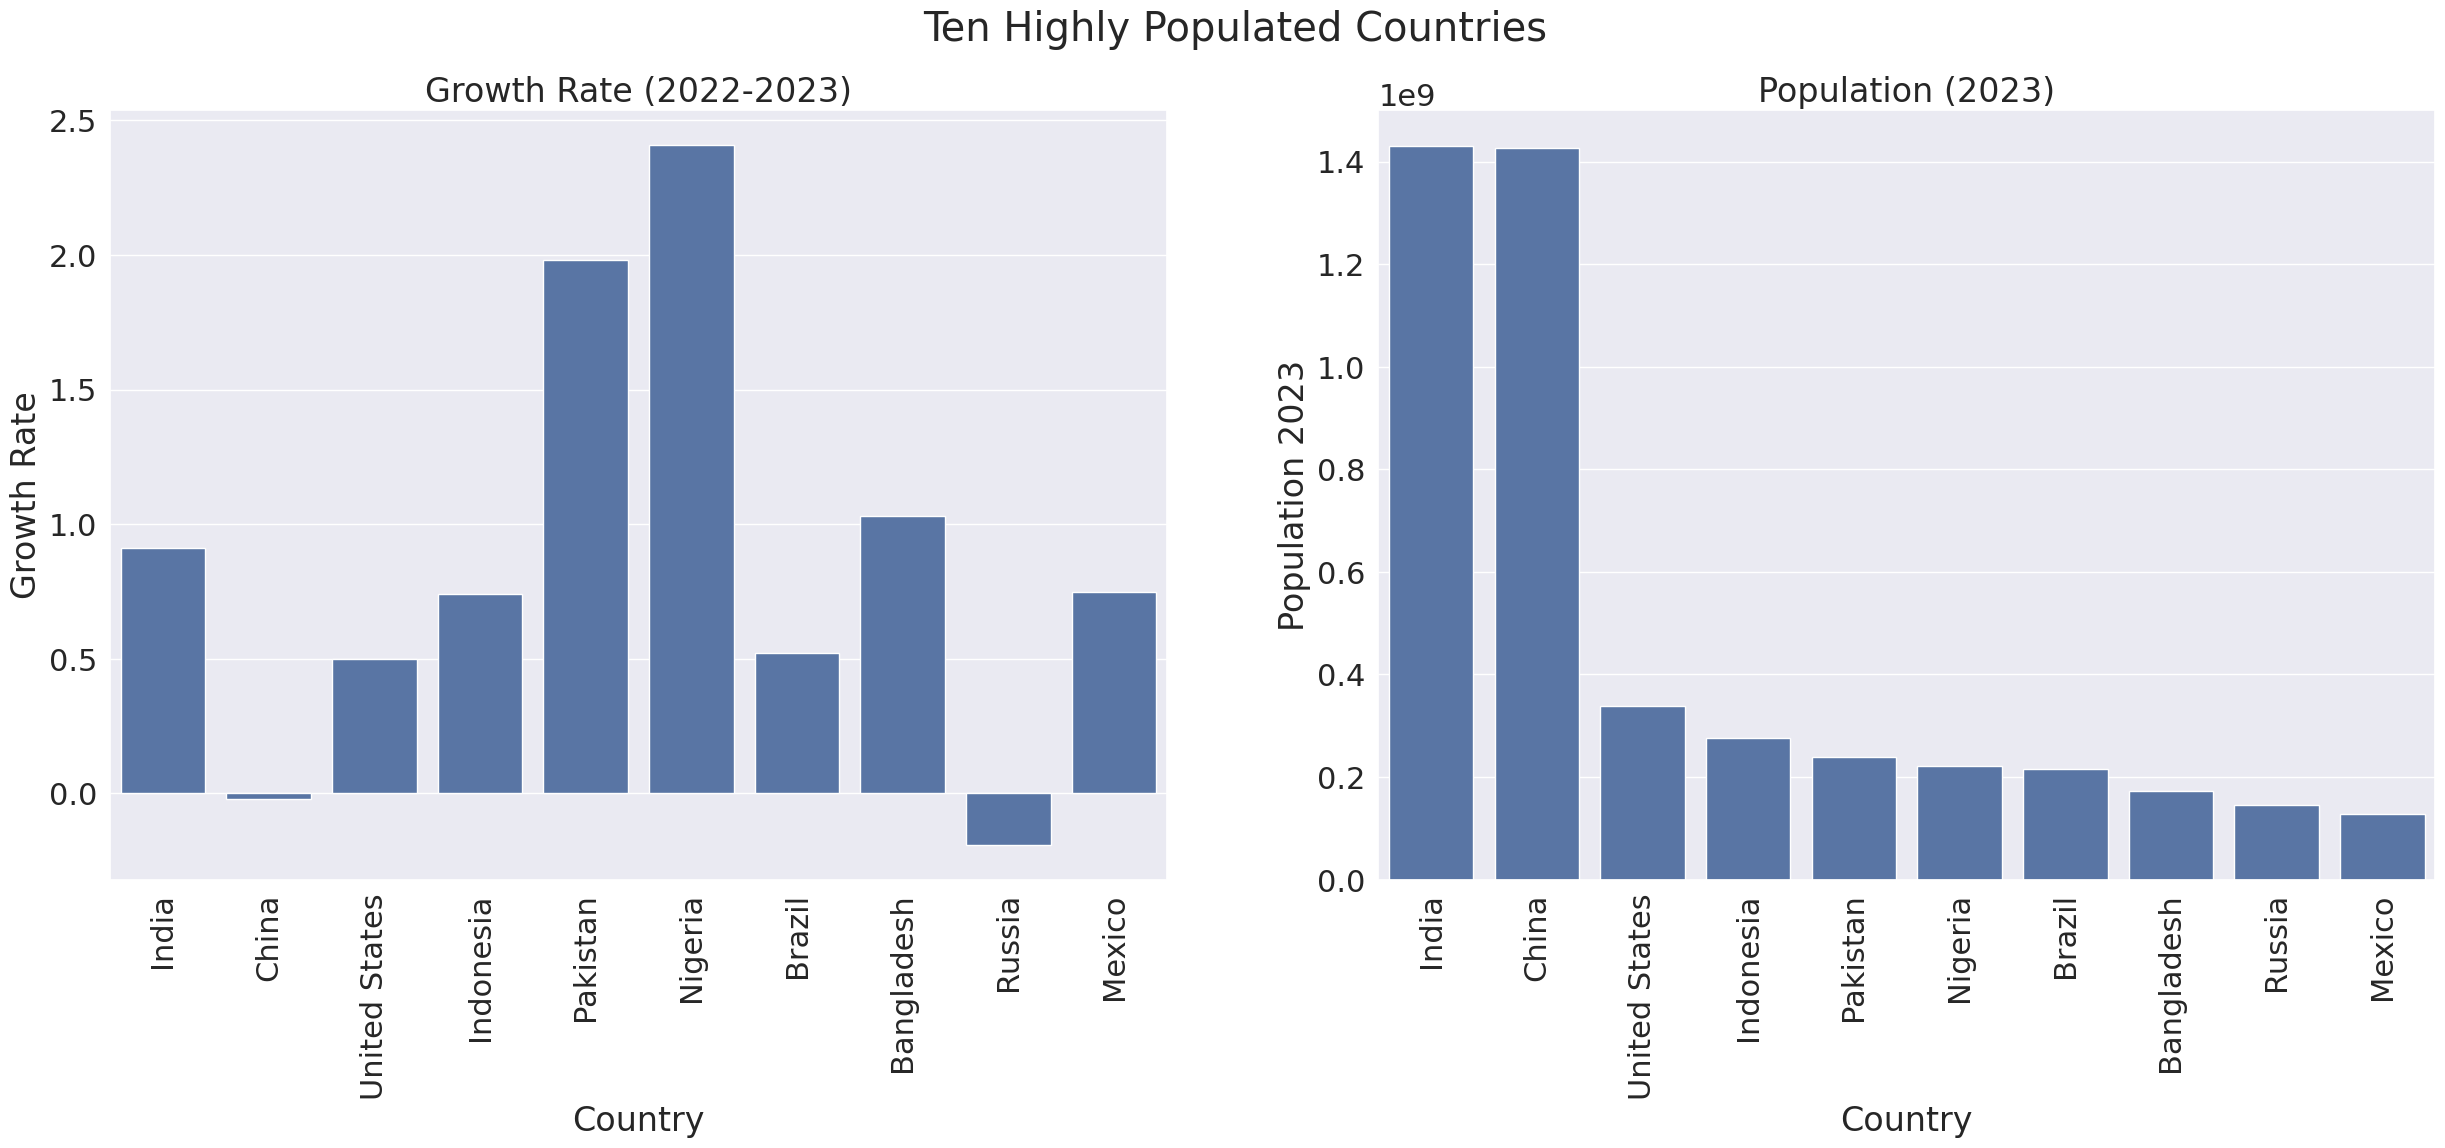

In [22]:
sns.set(font_scale=2)
fig, ax =plt.subplots(1,2,figsize = (30,10))

sns.barplot( x = "Country", y = "Growth Rate",data = m1, ax=ax[0])
sns.barplot(x ="Country",y = "Population 2023",data =m1, ax=ax[1])

ax[0].set_title ("Growth Rate (2022-2023)")
ax[1].set_title("Population (2023)")


ax[0].set_xticklabels(labels = m1["Country"],rotation=90)
ax[1].set_xticklabels(labels = m1["Country"],rotation=90)

plt.suptitle ("Ten Highly Populated Countries")
plt.show()

In [24]:
p_g = df[df["Growth Rate"] >0].sort_values("Growth Rate",ignore_index = True, ascending = False)
p_g

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,Moldova,3487283,3272996,33.8K,32.9K,104.0,4.98,0.04,134
1,Syria,22754313,22125249,185.2K,183.6K,126.0,4.98,0.29,60
2,Niger,26780177,26207977,1.3M,1.3M,21.0,3.80,0.34,54
3,Dr Congo,100880253,99010212,2.3M,2.3M,45.0,3.29,1.28,15
4,Chad,18044193,17723315,1.3M,1.3M,15.0,3.13,0.23,67
...,...,...,...,...,...,...,...,...,...
168,Hong Kong,7488976,7488865,1.1K,1.1K,7135.0,0.04,0.09,104
169,Guadeloupe,395839,395752,1.6K,1.6K,243.0,0.02,0.00,178
170,Palau,18058,18055,459,460,39.0,0.02,0.00,222
171,Czech Republic,10491345,10493986,78.9K,77.2K,136.0,0.01,0.13,89


[]

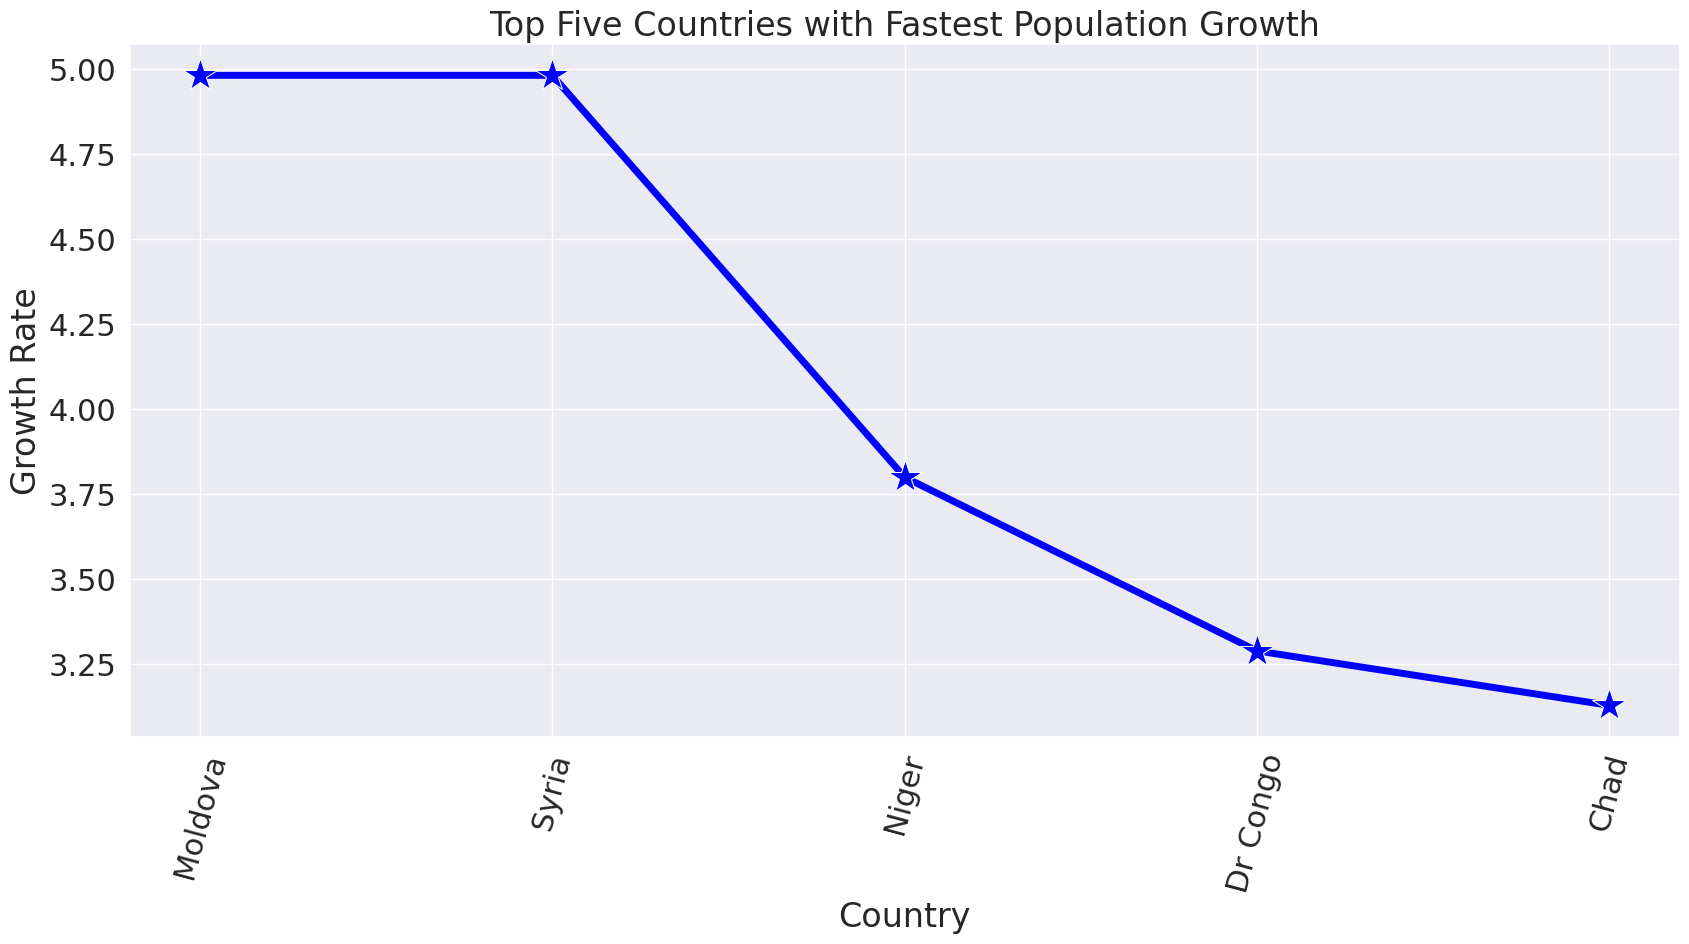

In [25]:
plt.figure(figsize =(20,9))
sns.lineplot(data = p_g.head(), x = "Country",y = "Growth Rate",marker = "*", color = "blue",markersize=25 ,linewidth=5)
plt.xticks(rotation =75)
plt.title("Top Five Countries with Fastest Population Growth")
plt.plot()